In [1]:
#Importing libraries

import pandas as pd
import numpy as np

In [12]:
## Getting data

train = pd.read_csv("HRDS_train.csv")
test= pd.read_csv("HRDS_test.csv")

In [13]:
## loading Pycaret with data

import pycaret

In [14]:
#Getting data shapes
train.shape

(19158, 14)

In [15]:
#Getting data shapes
test.shape

(2129, 13)

In [17]:
train.describe(include='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


In [18]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [19]:
# Handling missing values with the mode and then the numberical with the median. 

def fill_with_mode(dataframe, colname):
    mode = dataframe[colname].mode()[0]
    dataframe[colname].fillna(mode, inplace=True)
for i in train.select_dtypes(include='object').columns:
    fill_with_mode(train,i)
for j in test.select_dtypes(include='object').columns:
    fill_with_mode(test,j)

In [20]:
def fill_with_median(dataframe, colname):
    mode = dataframe[colname].mode()[0]
    dataframe[colname].fillna(mode, inplace=True)
for i in train.select_dtypes(include=['float64', 'int64']).columns:
    fill_with_median(train,i)
for j in test.select_dtypes(include=['float64', 'int64']).columns:
    fill_with_median(test,j)

In [23]:
train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [24]:
train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [25]:
# Using panda's profilling for EDA 
# Loading library
from pandas_profiling import ProfileReport

In [26]:
#Generating report 
profile = ProfileReport(train, title="Pandas Profiling Report")

In [27]:
#To view the report
profile.to_widgets()

**Discussion:**

At this point, the data has been preprocessed for handling missing values and filling in the blanks. Panda profile shows not strong correlation with any of the metrics to be concerned with multicollinarity. 

Please note you can also remove multicollinarity with Pycaret with the thrashold set. 

In [28]:
from pycaret.classification import *
clf1 = setup(data = train, target = 'target')

,Description,Value
0,session_id,4386
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(19158, 14)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [31]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7823,0.7807,0.4205,0.5903,0.4908,0.3574,0.3659,1.3070
lda,Linear Discriminant Analysis,0.7800,0.7730,0.4038,0.5869,0.4780,0.3448,0.3547,0.4730
lightgbm,Light Gradient Boosting Machine,0.7793,0.7789,0.4429,0.5763,0.5007,0.3622,0.3675,0.1410
ridge,Ridge Classifier,0.7790,0.0000,0.3579,0.5968,0.4472,0.3199,0.3363,0.0330
catboost,CatBoost Classifier,0.7789,0.7783,0.4184,0.5795,0.4857,0.3497,0.3573,13.7550
ada,Ada Boost Classifier,0.7754,0.7734,0.3107,0.5973,0.4084,0.2867,0.3101,0.3830
rf,Random Forest Classifier,0.7658,0.7637,0.3653,0.5473,0.4378,0.2974,0.3072,1.0630
lr,Logistic Regression,0.7553,0.7075,0.1304,0.5713,0.1807,0.1153,0.1465,0.8260
et,Extra Trees Classifier,0.7553,0.7406,0.3689,0.5147,0.4295,0.2792,0.2856,1.5700
svm,SVM - Linear Kernel,0.7240,0.0000,0.0603,0.0269,0.0372,0.0040,0.0049,0.4410


In [33]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.7739,0.4256,0.5766,0.4897,0.3518,0.3584
1,0.7912,0.7933,0.4345,0.6186,0.5105,0.3829,0.3926
2,0.7867,0.7830,0.4226,0.6068,0.4982,0.3683,0.3780
3,0.7875,0.8133,0.4746,0.5933,0.5274,0.3925,0.3965
4,0.7763,0.7687,0.3881,0.5778,0.4643,0.3297,0.3402
5,0.7875,0.7824,0.4358,0.6033,0.5061,0.3751,0.3832
6,0.7837,0.7782,0.4239,0.5941,0.4948,0.3621,0.3704
7,0.7703,0.7638,0.3881,0.5579,0.4577,0.3180,0.3264
8,0.7703,0.7732,0.3672,0.5616,0.4440,0.3072,0.3182
9,0.7912,0.7772,0.4448,0.6132,0.5156,0.3868,0.3949


In [34]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7726,0.7739,0.3958,0.5660,0.4658,0.3271,0.3355
1,0.7919,0.7862,0.4405,0.6192,0.5148,0.3871,0.3962
2,0.7867,0.7860,0.4018,0.6136,0.4856,0.3584,0.3712
3,0.7845,0.8017,0.4358,0.5935,0.5026,0.3691,0.3763
4,0.7763,0.7646,0.3701,0.5822,0.4526,0.3206,0.3336
5,0.7785,0.7767,0.4000,0.5826,0.4743,0.3401,0.3498
6,0.7867,0.7851,0.4149,0.6070,0.4929,0.3639,0.3744
7,0.7778,0.7623,0.3821,0.5845,0.4621,0.3297,0.3415
8,0.7644,0.7655,0.3582,0.5430,0.4317,0.2908,0.3008
9,0.7905,0.7744,0.4299,0.6154,0.5062,0.3784,0.3883


In [35]:
pred_holdout = predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7841,0.7948,0.4417,0.5851,0.5034,0.3689,0.3748


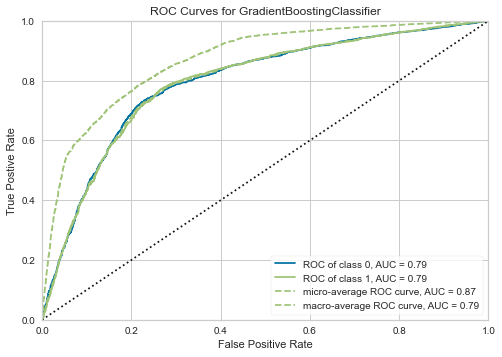

In [36]:
plot_model(gbc)

In [39]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4386, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
#Finalizing predictions based off the training data. 
gbc_final = finalize_model(gbc)

In [42]:
#Predictions of unseen data. 
predictions = predict_model(gbc_final, data = test)

In [43]:
predictions

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Label,Score
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Pvt Ltd,1,21,0.0,0.8819
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,98,0.0,0.7086
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,<1,50-99,Pvt Ltd,never,15,1.0,0.5106
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0.0,0.9040
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,0.0,0.8940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,50-99,Public Sector,4,15,0.0,0.5970
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,50-99,Pvt Ltd,2,30,0.0,0.8761
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,STEM,3,50-99,Pvt Ltd,never,18,0.0,0.8506
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,STEM,7,100-500,Public Sector,1,84,0.0,0.9184
